<a href="https://colab.research.google.com/github/raulzz99/neural_networks/blob/master/FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST dataset, simple fully connected neural network with 3 **layers**

Our objective is to set up a neural network problem using the MNIST dataset (https://www.tensorflow.org/datasets/catalog/mnist), which is commonly used for classifying handwritten digits. We'll implement a fully connected (FC) neural network and test three different combinations of activation functions, optimizers, regularizers, and loss functions.

Here's the plan for three different models:

Dataset MNIST provides input of size 28x28.

Let's use dense layers of size 128, 64 and 10 (3 layers) for all the 3 models.

Model 1: Basic Model Activation Function: ReLU for hidden layers, Softmax for output Optimizer: Stochastic Gradient Descent (SGD) Regularizer: None Loss Function: Categorical Crossentropy
Model 2: Intermediate Model Activation Function: Leaky ReLU for hidden layers, Softmax for output Optimizer: Adam Regularizer: L2 regularization Loss Function: Categorical Crossentropy
Model 3: Advanced Model Activation Function: Swish for hidden layers, Softmax for output Optimizer: Adam with learning rate decay Regularizer: Dropout Loss Function: Categorical Crossentropy
Steps: Data Preparation: We'll load and preprocess the MNIST dataset. Model Definition: Three models will be created with the configurations mentioned above. Training: Train the models and track metrics like loss and accuracy. Evaluation: Compare the performance of the three models

MNIST is a simple dataset. The expectation is that though all 3 models might produce a high accuracy, model 3 might perform better than model 2, and model 2 might perform better than model 1. (It need not be true all the time, due to the simple nature of this dataset)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
##Let’s assume x_train originally has a shape of (num_samples, 28, 28),
# where num_samples is the number of images in the training set,
# and each image is a 28x28 pixel image (like the images in the MNIST dataset).
# The reshape will turn each image, which is a 2D array of shape (28, 28),
# into a 1D array of shape (784,).
#  The -1 will automatically figure out how many images there are, so the new shape will be (num_samples, 784).
# 255 will normalize the pixel value
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0


In [5]:
x_test.shape

(10000, 784)

In [8]:
# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [9]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [10]:
def create_model_1():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(28*28,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
    # Compile the model using the function model.compile using the optimizer mentioned above
    return model

In [13]:
def create_model_2():
    model = Sequential([
        Dense(128, activation='leaky_relu', input_shape=(28*28,), kernel_regularizer=regularizers.l2(0.001)),
        Dense(64, activation='leaky_relu', kernel_regularizer=regularizers.l2(0.001)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
def create_model_3():
    model = Sequential([
        Dense(128, activation='swish', input_shape=(28*28,)),
        Dropout(0.5),
        Dense(64, activation='swish'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Model 1 (Basic Model):


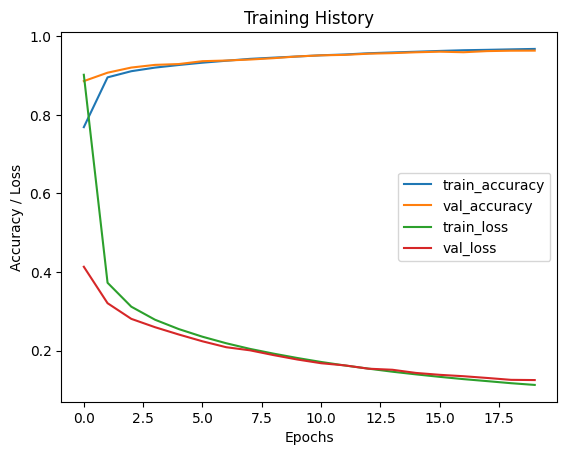

Test accuracy: 0.9636, Test loss: 0.1249

Model 2 (Intermediate Model):


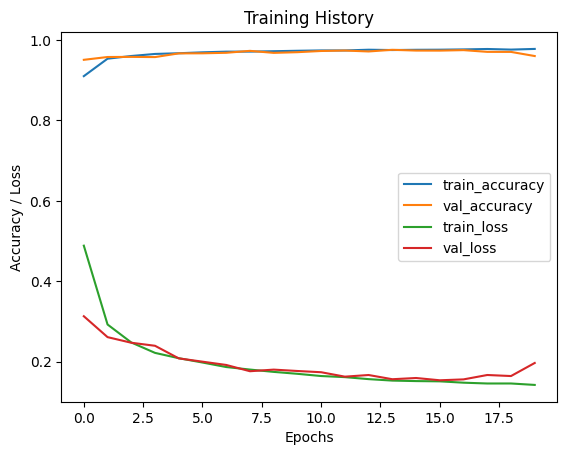

Test accuracy: 0.9603, Test loss: 0.1964

Model 3 (Advanced Model):


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


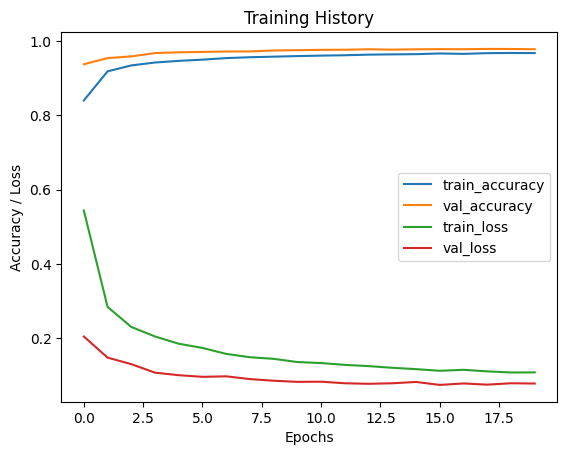

Test accuracy: 0.9779, Test loss: 0.0779


In [15]:
def train_and_plot(model, x_train, y_train, x_test, y_test, epochs=20, batch_size=64):
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=0)

    # Plot the accuracy and loss
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Training History')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy / Loss')
    plt.legend()
    plt.show()

    # Evaluate the model
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test accuracy: {accuracy:.4f}, Test loss: {loss:.4f}")

# Train and plot for all models
print("Model 1 (Basic Model):")
model_1 = create_model_1()
train_and_plot(model_1, x_train, y_train, x_test, y_test)

print("\nModel 2 (Intermediate Model):")
model_2 = create_model_2()
train_and_plot(model_2, x_train, y_train, x_test, y_test)

print("\nModel 3 (Advanced Model):")
model_3 = create_model_3()
train_and_plot(model_3, x_train, y_train, x_test, y_test)